### Libraries and Packages

In [1]:
# Basics
import pandas as pd
import numpy as np
import time as tm
import math
# For Exploratory Data Analysis (EDA)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [50]:
header = ["date","time","flow","anomaly"]
df = pd.read_csv('Barreiro2018.csv', sep=';', names=header)
holidays = pd.read_csv('Holidays.csv',sep=';')
#df

In [51]:
# sep= , for WU2 and WU3

In [52]:
df

,date,time,flow,anomaly
0,01/01/2018,00:07:30,18.333067,0
1,01/01/2018,00:22:30,18.333067,0
2,01/01/2018,00:37:30,19.784872,0
3,01/01/2018,00:52:30,22.294744,0
4,01/01/2018,01:07:30,27.229756,0
...,...,...,...,...
35035,31/12/2018,22:52:30,24.792000,0
35036,31/12/2018,23:07:30,23.029933,0
35037,31/12/2018,23:22:30,20.415628,0
35038,31/12/2018,23:37:30,22.019056,0


#### Municipal holiday

In [53]:
newdate = ['28/06/2018']
holidays.loc[766]= newdate

### Average monthly consumption

In [54]:
# or Monthly Mean Flow

In [55]:
df.date = pd.to_datetime(df.date)

In [56]:
df['month'] = df['date'].dt.month

In [57]:
month_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in np.arange(1,13,1):
    print(month_label[i-1],'Mean Flow:', np.mean(df[df['month']==i]['flow'].values))

Jan Mean Flow: 28.44249346354402
Feb Mean Flow: 30.775725399448664
Mar Mean Flow: 26.750138347949935
Apr Mean Flow: 28.316218195804513
May Mean Flow: 35.8705528060205
Jun Mean Flow: 39.55726200497292
Jul Mean Flow: 43.37850580115457
Aug Mean Flow: 45.32908177719825
Sep Mean Flow: 44.024363397473955
Oct Mean Flow: 34.4802574664375
Nov Mean Flow: 27.656000097223266
Dec Mean Flow: 26.72703065529805


In [58]:
df.set_index('date',inplace=True)

In [59]:
df.resample(rule = 'MS').mean()#.head(12)

,flow,anomaly,month
date,,,
2018-01-01,28.442493,0.000000,1.0
2018-02-01,30.775725,0.000000,2.0
2018-03-01,26.750138,0.000000,3.0
2018-04-01,28.316218,0.000000,4.0
2018-05-01,35.870553,0.000000,5.0
2018-06-01,39.557262,0.008681,6.0
2018-07-01,43.378506,0.000000,7.0
2018-08-01,45.329082,0.000000,8.0
2018-09-01,44.024363,0.000000,9.0


In [60]:
df.resample(rule = 'M').mean()#.head(12)

,flow,anomaly,month
date,,,
2018-01-31,28.442493,0.000000,1.0
2018-02-28,30.775725,0.000000,2.0
2018-03-31,26.750138,0.000000,3.0
2018-04-30,28.316218,0.000000,4.0
2018-05-31,35.870553,0.000000,5.0
2018-06-30,39.557262,0.008681,6.0
2018-07-31,43.378506,0.000000,7.0
2018-08-31,45.329082,0.000000,8.0
2018-09-30,44.024363,0.000000,9.0


In [61]:
df

,time,flow,anomaly,month
date,,,,
2018-01-01,00:07:30,18.333067,0,1
2018-01-01,00:22:30,18.333067,0,1
2018-01-01,00:37:30,19.784872,0,1
2018-01-01,00:52:30,22.294744,0,1
2018-01-01,01:07:30,27.229756,0,1
...,...,...,...,...
2018-12-31,22:52:30,24.792000,0,12
2018-12-31,23:07:30,23.029933,0,12
2018-12-31,23:22:30,20.415628,0,12


[Text(0, 0.5, 'Average Consumption (m3/s)'),
 Text(0.5, 0, 'Date (months)'),
 Text(0.5, 1.0, 'Average Annual Consumption (year 2018)')]

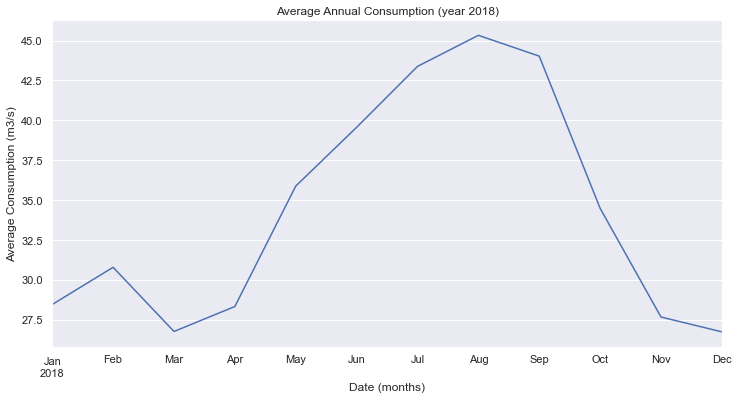

In [62]:
ax = df['flow'].resample(rule='MS').mean().plot(figsize=(12,6))
ax.set(title='Average Annual Consumption (year 2018)', xlabel='Date (months)', ylabel='Average Consumption (m3/s)')

### By dayofweek

In [30]:
header = ["date","time","flow","anomaly"]
#header = ["datetime", "flow"] # for WU2 and WU3
df = pd.read_csv('Beja2018.csv', sep=',', names=header) # ;
holidays = pd.read_csv('Holidays.csv',sep=';')

newdate = ['10/05/2018']
holidays.loc[766]= newdate

df['date'] = pd.to_datetime(df['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
#df['datetime'] = pd.to_datetime(df['datetime'])
#holidays['date'] = pd.to_datetime(holidays['date'])

df['dayofweek'] = pd.to_datetime(df['date'],dayfirst=True)
#df['dayofweek'] = pd.to_datetime(df['datetime'],dayfirst=True)
df['dayofweek'] = df['dayofweek'].dt.dayofweek

# if day is a holiday, then dayofweek is -1
df.loc[df.date.isin(holidays.date), 'dayofweek'] = -1
#df.loc[df.datetime.isin(holidays.date), 'dayofweek'] = -1

df['month'] = df['date'].dt.month
#df['month'] = df['datetime'].dt.month
# The month as January=1, December=12

df

,date,time,flow,anomaly,dayofweek,month
0,2018-01-02,10:37:30,29.534806,0,1,1
1,2018-01-02,10:52:30,28.979819,0,1,1
2,2018-01-02,11:07:30,29.563597,0,1,1
3,2018-01-02,11:22:30,30.627306,0,1,1
4,2018-01-02,11:37:30,31.665736,0,1,1
...,...,...,...,...,...,...
34896,2018-12-31,22:37:30,22.560056,0,0,12
34897,2018-12-31,22:52:30,23.785056,0,0,12
34898,2018-12-31,23:07:30,23.065833,0,0,12
34899,2018-12-31,23:22:30,20.357389,0,0,12


In [31]:
#df_weekdays: contains data related to weekdays 
#df_sat: contains data related to saturdays
#df_sun: contains data related to sundays and holidays
df_weekdays = df[(df['dayofweek']>=0) & (df['dayofweek']<=4)]
df_sat = df[df['dayofweek']==5]
df_sun = df[(df['dayofweek']==-1) | (df['dayofweek']==6)]

In [32]:
df_weekdays

,date,time,flow,anomaly,dayofweek,month
0,2018-01-02,10:37:30,29.534806,0,1,1
1,2018-01-02,10:52:30,28.979819,0,1,1
2,2018-01-02,11:07:30,29.563597,0,1,1
3,2018-01-02,11:22:30,30.627306,0,1,1
4,2018-01-02,11:37:30,31.665736,0,1,1
...,...,...,...,...,...,...
34896,2018-12-31,22:37:30,22.560056,0,0,12
34897,2018-12-31,22:52:30,23.785056,0,0,12
34898,2018-12-31,23:07:30,23.065833,0,0,12
34899,2018-12-31,23:22:30,20.357389,0,0,12


In [33]:
df.set_index('date',inplace=True)
df_weekdays.set_index('date',inplace=True)
df_sat.set_index('date',inplace=True)
df_sun.set_index('date',inplace=True)
#df.set_index('datetime',inplace=True)
#df_weekdays.set_index('datetime',inplace=True)
#df_sat.set_index('datetime',inplace=True)
#df_sun.set_index('datetime',inplace=True)

In [34]:
df_weekdays.resample(rule = 'M').mean()#.head(12)

,flow,anomaly,dayofweek,month
date,,,,
2018-01-31,21.757621,0.000000,1.626335,1.0
2018-02-28,21.900693,0.000000,2.000000,2.0
2018-03-31,20.617669,0.000000,2.047619,3.0
2018-04-30,21.254719,0.000000,1.900000,4.0
2018-05-31,23.314145,0.000000,1.904762,5.0
2018-06-30,26.403795,0.000000,2.095238,6.0
2018-07-31,30.087799,0.015152,1.863636,7.0
2018-08-31,32.094147,0.000000,2.136364,8.0
2018-09-30,31.332384,0.000000,2.000000,9.0


In [35]:
df = df['flow'].resample(rule='M').mean()

In [36]:
df.shape

(12,)

In [37]:
df

date
2018-01-31    21.723931
2018-02-28    22.006647
2018-03-31    20.757760
2018-04-30    21.366713
2018-05-31    23.935184
2018-06-30    26.661452
2018-07-31    30.324215
2018-08-31    32.001474
2018-09-30    31.518523
2018-10-31    26.298084
2018-11-30    22.554530
2018-12-31    22.901343
Freq: M, Name: flow, dtype: float64

In [38]:
line1 = df_weekdays['flow'].resample(rule='M').mean()#.plot(figsize=(12,6))
line2 = df_sat['flow'].resample(rule='M').mean()
line3 = df_sun['flow'].resample(rule='M').mean()

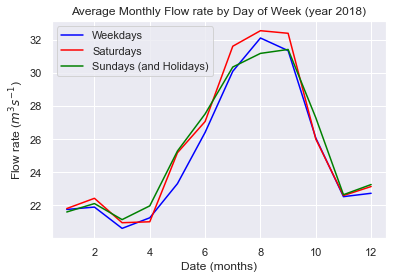

In [39]:
x = np.linspace(1,len(df),12)  
    
plt.plot(x, line1, label='Weekdays',color='blue')
plt.plot(x, line2, label='Saturdays',color='red')
plt.plot(x, line3, label='Sundays (and Holidays)',color='green')
plt.xlabel('Date (months)')
plt.ylabel('Flow rate ($m^3s^{-1}$)')
plt.title('Average Monthly Flow rate by Day of Week (year 2018)')
plt.legend(loc="best")
plt.show()